# Demonstrate to match the images and do aperture photometry with the `atlas` object

In [2]:
import sys
sys.path.append("../")

import glob
import numpy as np
from pixsed.photometry_tools import Image, Atlas
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

Could not import regions, which is required for some of the functionalities of this module.


['data/NGC5194_GALEX_FUV.fits', 'data/NGC5194_SDSS_r.fits', 'data/NGC5194_SDSS_i.fits', 'data/NGC5194_2MASS_Ks.fits', 'data/NGC5194_WISE_3.4.fits', 'data/NGC5194_WISE_4.6.fits']


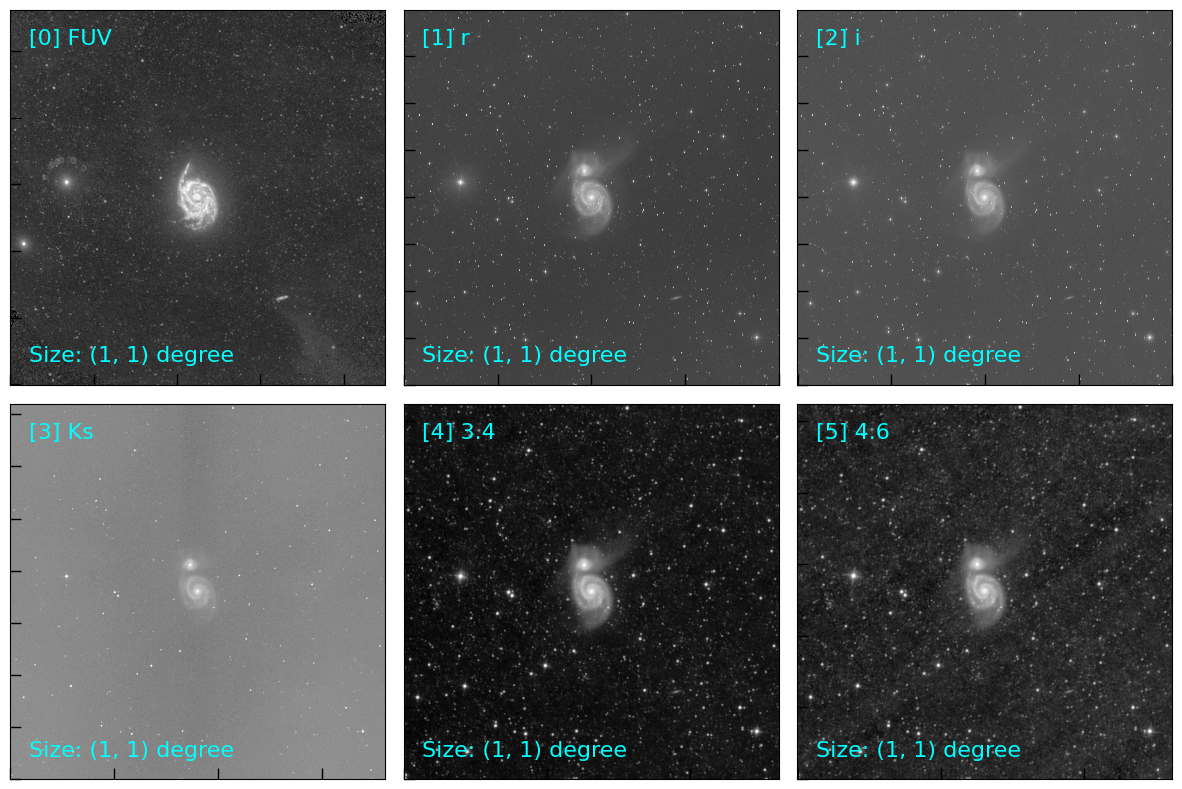

CPU times: user 5.4 s, sys: 2.82 s, total: 8.22 s
Wall time: 10.1 s


In [3]:
%%time 

files = ['data/NGC5194_GALEX_FUV.fits', 
         'data/NGC5194_SDSS_r.fits', 
         'data/NGC5194_SDSS_i.fits', 
         'data/NGC5194_2MASS_Ks.fits',
         'data/NGC5194_WISE_3.4.fits', 
         'data/NGC5194_WISE_4.6.fits']
telescope_list = ['GALEX', 'SDSS', 'SDSS', '2MASS', 'WISE', 'WISE']
band_list = ['FUV', 'r', 'i', 'Ks', '3.4', '4.6']
print(files)

atl = Atlas(files, coord_sky=('13h29m52.698s', '+47d11m42.93s'), 
            band_list=band_list, verbose=True)

atl.plot_atlas(ncols=3, show_info='size', show_units='degree')
plt.show()

### Set the coverage mask for the FUV data

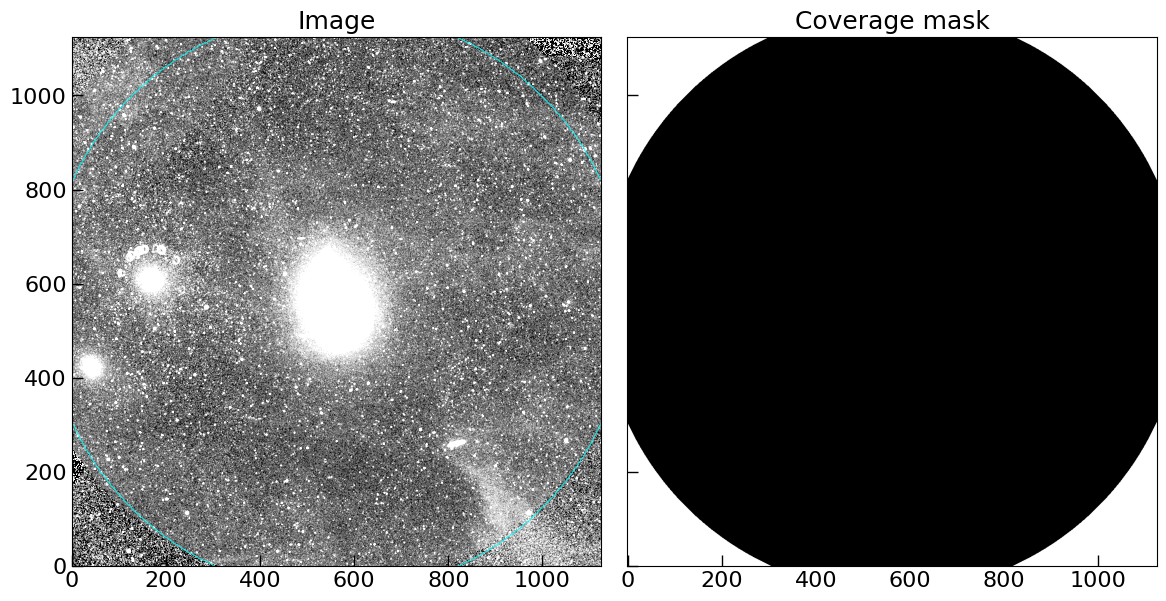

In [4]:
x = 1125 // 2
y = 1125 // 2
r = (x + y) * 1.1 // 2
atl.set_mask_coverage(0, shape='circle', mask_kwargs=dict(x=x, y=y, radius=r), plot=True)

### Process the data and generate the cleaned images

[remove_background] image 0: Image of NGC5194 in FUV


[remove_background] image 1: Image of NGC5194 in r
[remove_background] image 2: Image of NGC5194 in i
[remove_background] image 3: Image of NGC5194 in Ks
[remove_background] image 4: Image of NGC5194 in 3.4
[remove_background] image 5: Image of NGC5194 in 4.6
[clean_image] model image 0: Image of NGC5194 in FUV


[clean_image] clean image 0: Image of NGC5194 in FUV
[clean_image] model image 1: Image of NGC5194 in r
[clean_image] clean image 1: Image of NGC5194 in r
[clean_image] model image 2: Image of NGC5194 in i
[clean_image] clean image 2: Image of NGC5194 in i
[clean_image] model image 3: Image of NGC5194 in Ks
[clean_image] clean image 3: Image of NGC5194 in Ks
[clean_image] model image 4: Image of NGC5194 in 3.4
[clean_image] clean image 4: Image of NGC5194 in 3.4
[clean_image] model image 5: Image of NGC5194 in 4.6
[clean_image] clean image 5: Image of NGC5194 in 4.6
Found 5832 masks!


100%|██████████| 5832/5832 [00:01<00:00, 4336.12it/s]


Found 57 masks!


100%|██████████| 57/57 [00:00<00:00, 3710.68it/s]


Found 30 masks!


100%|██████████| 30/30 [00:00<00:00, 4046.86it/s]


Found 6659 masks!


100%|██████████| 6659/6659 [00:01<00:00, 3994.08it/s]


Found 65 masks!


100%|██████████| 65/65 [00:00<00:00, 3345.48it/s]


Found 30 masks!


100%|██████████| 30/30 [00:00<00:00, 3003.58it/s]


Found 6659 masks!


100%|██████████| 6659/6659 [00:01<00:00, 3790.25it/s]


Found 65 masks!


100%|██████████| 65/65 [00:00<00:00, 3855.49it/s]


Found 30 masks!


100%|██████████| 30/30 [00:00<00:00, 2975.32it/s]


Found 6637 masks!


100%|██████████| 6637/6637 [00:01<00:00, 4471.04it/s]


Found 65 masks!


100%|██████████| 65/65 [00:00<00:00, 4158.48it/s]


Found 30 masks!


100%|██████████| 30/30 [00:00<00:00, 3378.78it/s]


Found 6577 masks!


100%|██████████| 6577/6577 [00:01<00:00, 4334.95it/s]


Found 65 masks!


100%|██████████| 65/65 [00:00<00:00, 4298.59it/s]


Found 30 masks!


100%|██████████| 30/30 [00:00<00:00, 3933.39it/s]


Found 6577 masks!


100%|██████████| 6577/6577 [00:01<00:00, 5212.24it/s]


Found 65 masks!


100%|██████████| 65/65 [00:00<00:00, 4027.50it/s]


Found 30 masks!


100%|██████████| 30/30 [00:00<00:00, 3599.64it/s]


CPU times: user 5min 13s, sys: 1min 12s, total: 6min 25s
Wall time: 8min 8s


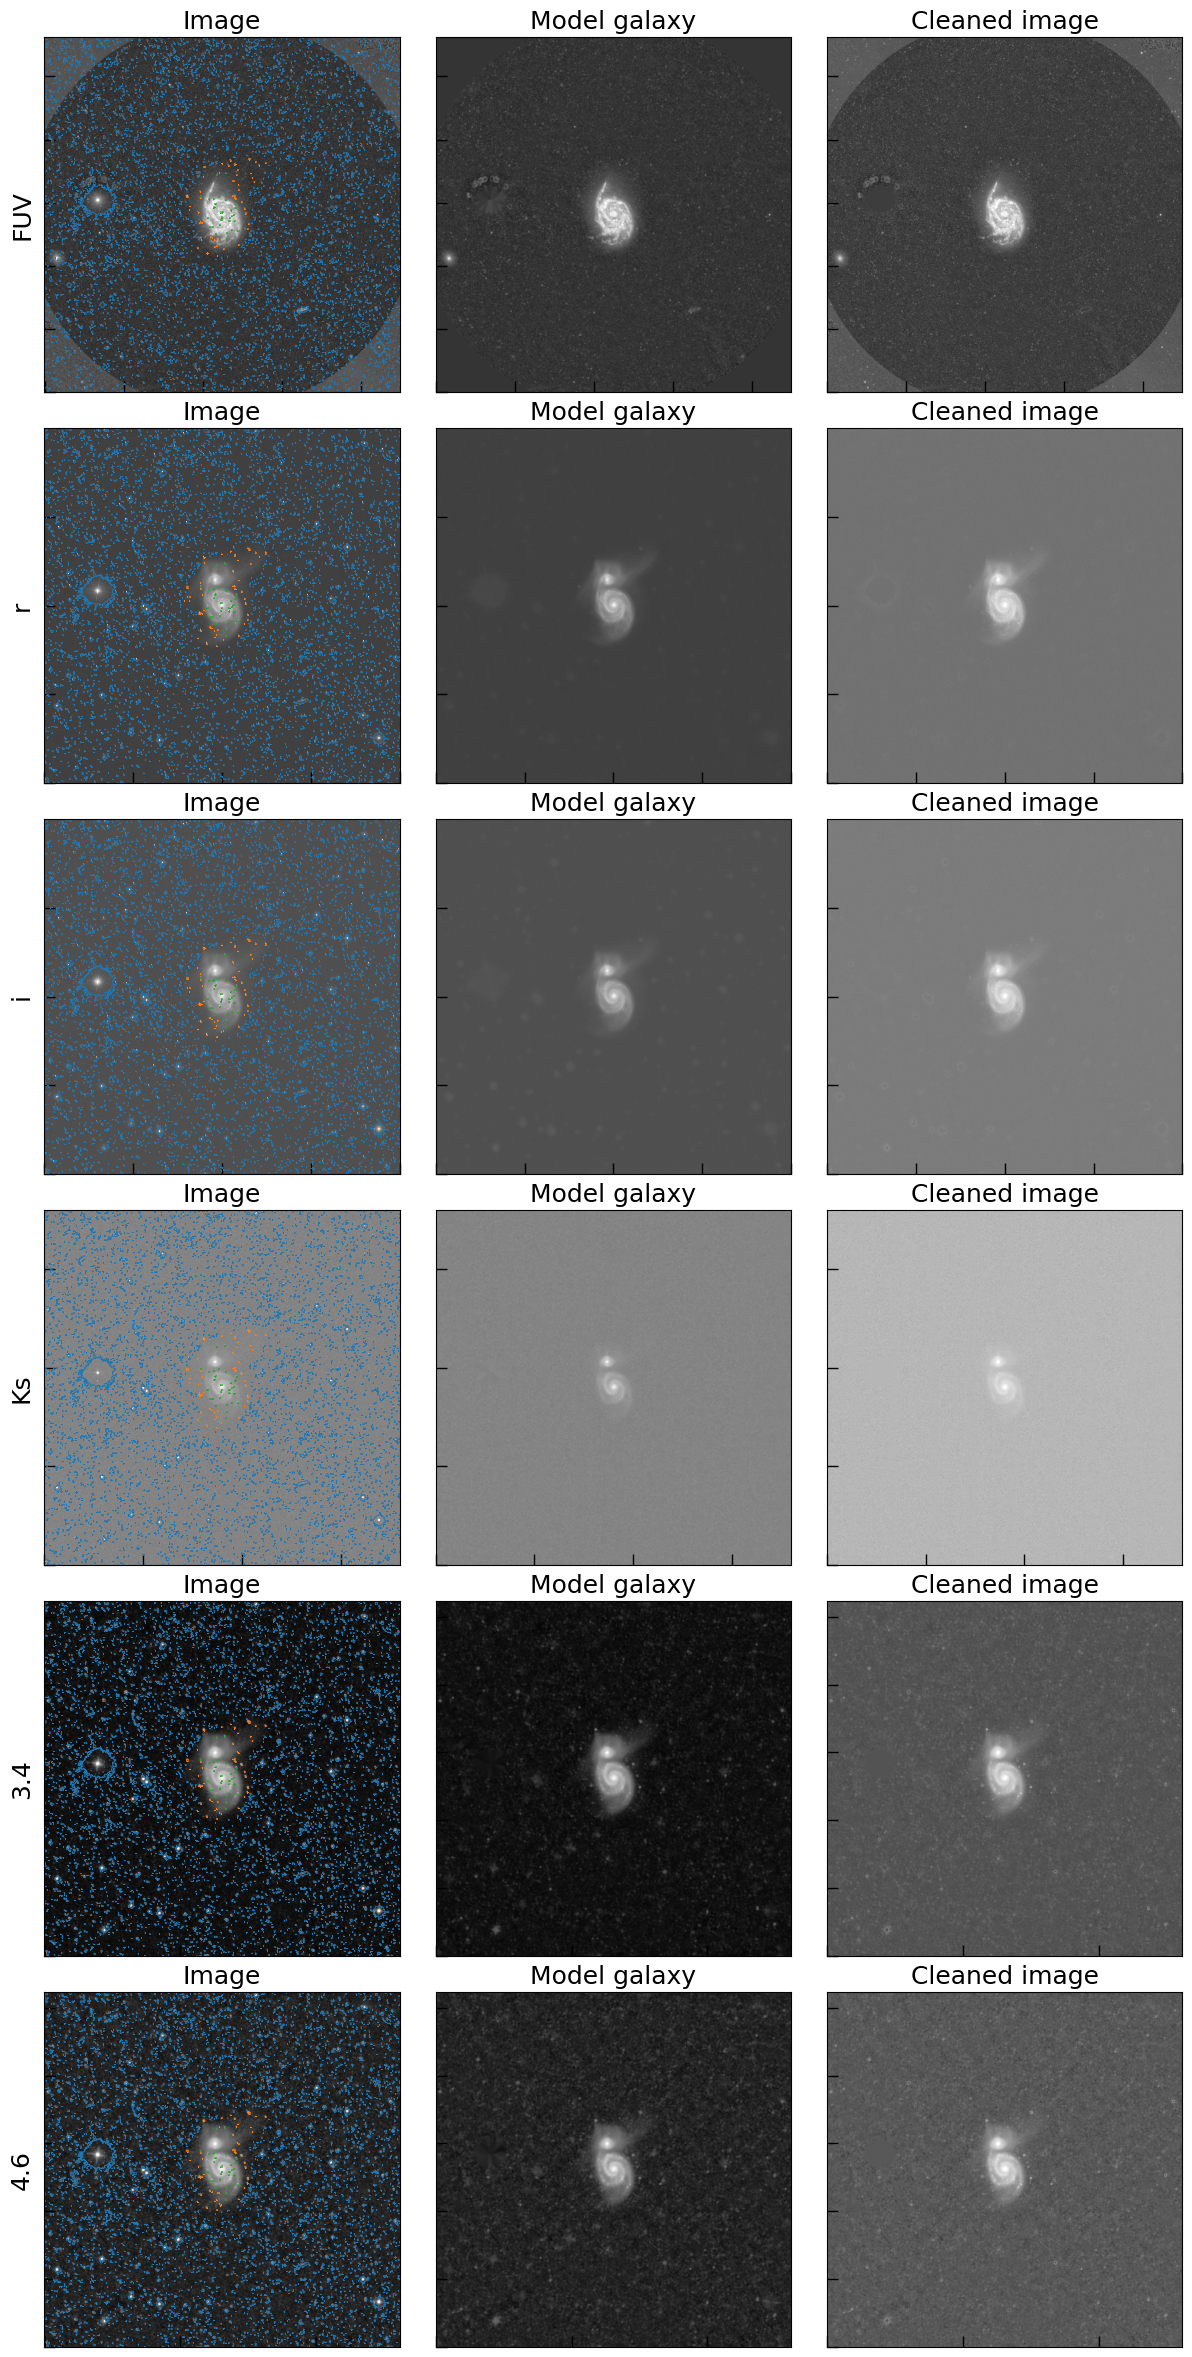

In [5]:
%%time

atl.adapt_masks(filename='data/NGC5194_SDSS_r_clean.fits', plot=False, verbose=False)
atl.remove_background(verbose=True)
atl.gen_mask_contaminant(image_index=None, expand_inner=1.5, expand_edge=3, 
                         expand_outer=3, plot=False, interactive=False)
atl.clean_image(verbose=True, plot=True, interactive=False)

### Generate matched images

  0%|          | 0/6 [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:11<00:22, 22.14s/it]

[gen_images_matched]: Skip convolution of Image of NGC5194 in 4.6 (pixel scale: 6.4")!


100%|██████████| 6/6 [02:17<00:00, 22.95s/it]


CPU times: user 2min 14s, sys: 1.24 s, total: 2min 15s
Wall time: 2min 18s


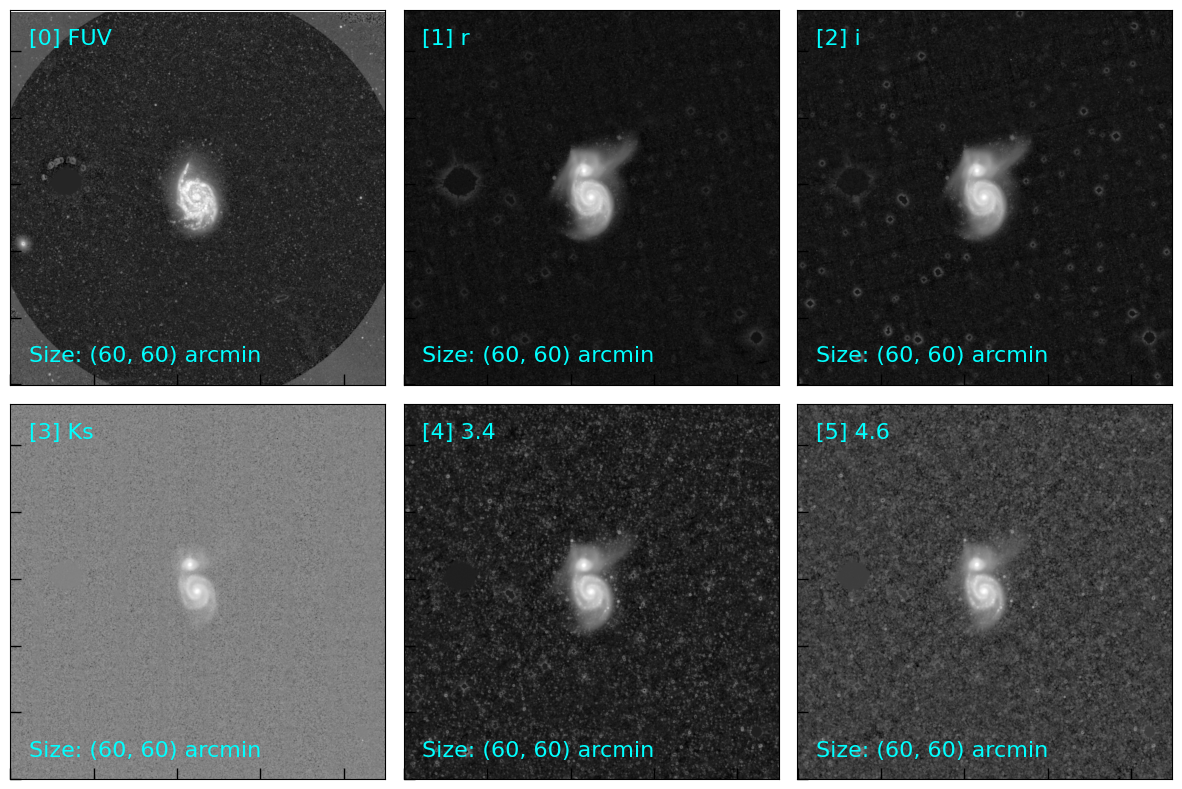

In [8]:
%%time


fwhmList = [4.3, 1.3, 1.3, 2.0, 6.1, 6.4]

for loop, fwhm in enumerate(fwhmList):
    atl[loop].set_psf_sizes(fwhm=fwhm)

atl.match_image(psf_fwhm=6.4, image_size=3600, progress_bar=True, plot=True, verbose=True, skip_variance=True)